## Basic machine learning with scikit-learn
***
In this notebook main steps for training a machine learning model is demonstrated
1. Import, explore, and clean up data
2. Split data into training and test sets
3. Train a model and optimize model parameters
4. Evaluate model performance

Iris data set is made of 150 observation for 3 different Iris flower species (each specy has 50 observation). Each integer represents in iris.data represents a specy: 0 = setosa, 1 = versicolor, 2 = virginica. Each data point in iris.data represents 4 features of that observation each being one dimension 1. sepal length in cm  2. sepal width in cm 3. petal length in cm 4. petal width in cm .
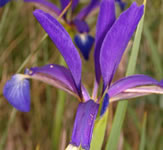

### 1. Import and explore data

In [1]:
import sklearn
from sklearn.datasets import load_iris     # import load_iris function from datasets module

print(sklearn.__version__)  

0.21.3


In [2]:
iris = load_iris()                         # create bunch object that contains iris dataset and its attributes
print(type(iris))                          # print type of iris object

print(type(iris.data))                     # print type of iris.data attribute
print(type(iris.target))                   # print type of iris.target attribute

print(iris.data.shape)                     # print shape of iris.data attribute
print(iris.target.shape)                   # print shape of iris.target attribute

<class 'sklearn.utils.Bunch'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)


In [3]:
print(iris.feature_names)                  # print feature names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print(iris.target_names)                   # print target names

['setosa' 'versicolor' 'virginica']


In [5]:
print(iris.target)                         # print values of target

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [6]:
iris.data     # print data features of iris object, each row represents one observation, each column is one feature

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### 2. Split data into training and test data sets

In [7]:
from sklearn.model_selection import train_test_split

X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)     # slipt data into training and test sets

In [8]:
print(X_train.shape)
print(X_test.shape)

(112, 4)
(38, 4)


### 3. Create KNN model

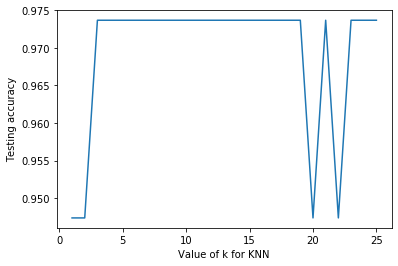

In [9]:
from sklearn.neighbors import KNeighborsClassifier          # k-nearest neighbors classifier 
from sklearn.metrics import accuracy_score                  # this function computes accuracy of model
import matplotlib.pyplot as plt

# Select model parameters: find optimal k value -> number of categories the data should be divied into
# Train model with various k values and find a value providing an optimal trade-off between computational cost vs accuracy

k_range = range(1,26)
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)              # build KNN model
    knn.fit(X_train,y_train)                               # Train KNN model
    y_pred = knn.predict(X_test)                           # Predict y for test data
    scores_list.append(accuracy_score(y_test, y_pred))     # Find accuracy for test data

# plot accuracy vs k value
%matplotlib inline
plt.plot(k_range, scores_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing accuracy');

In [10]:
# Choose smallest k that gives higher accurcy (k = 3) and create final model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

### 4. Evaluate model accuracy

In [11]:
y_pred = knn.predict(X_test)
accuracy_score(y_test, y_pred)

0.9736842105263158

### Read more on this [link](http://www.utc.fr/~jlaforet/Suppl/python-cheatsheets.pdf)